### Assignment : Associaton- Rules :

In [2]:
#### All Tasks at a time 


Top 10 Association Rules:
                          antecedents      consequents  antecedent support  \
834  (ground beef, frozen vegetables)      (spaghetti)            0.024536   
913                      (milk, soup)  (mineral water)            0.021445   
830  (ground beef, frozen vegetables)  (mineral water)            0.024536   
950                 (soup, spaghetti)  (mineral water)            0.020672   
884           (ground beef, pancakes)  (mineral water)            0.020866   
602              (chicken, chocolate)  (mineral water)            0.021252   
895                 (milk, olive oil)  (mineral water)            0.024150   
710            (chocolate, olive oil)  (mineral water)            0.023570   
871               (milk, ground beef)  (mineral water)            0.031685   
781               (ground beef, eggs)  (mineral water)            0.028787   

     consequent support   support  confidence      lift  leverage  conviction  \
834            0.229521  0.012558

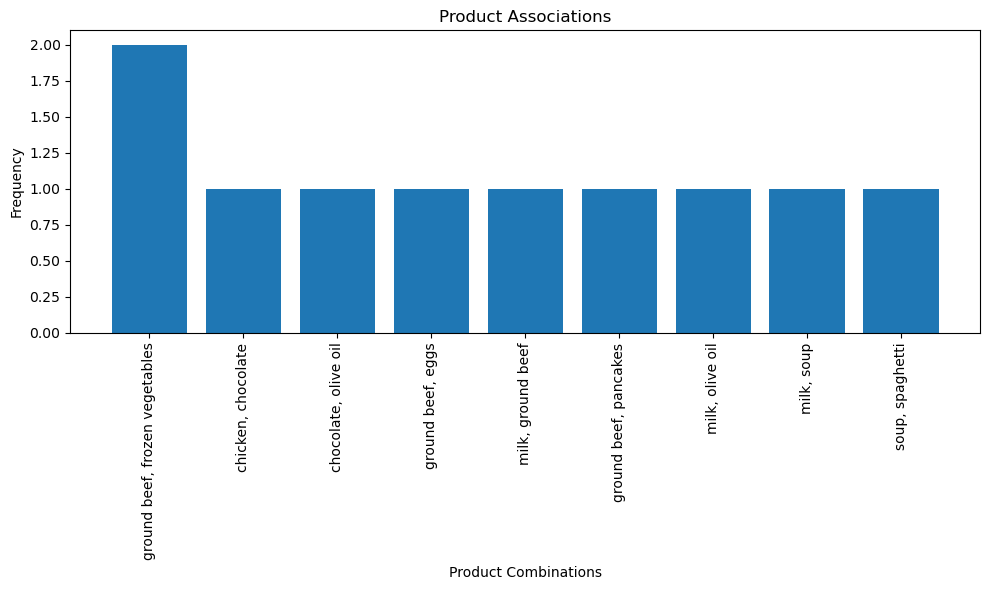

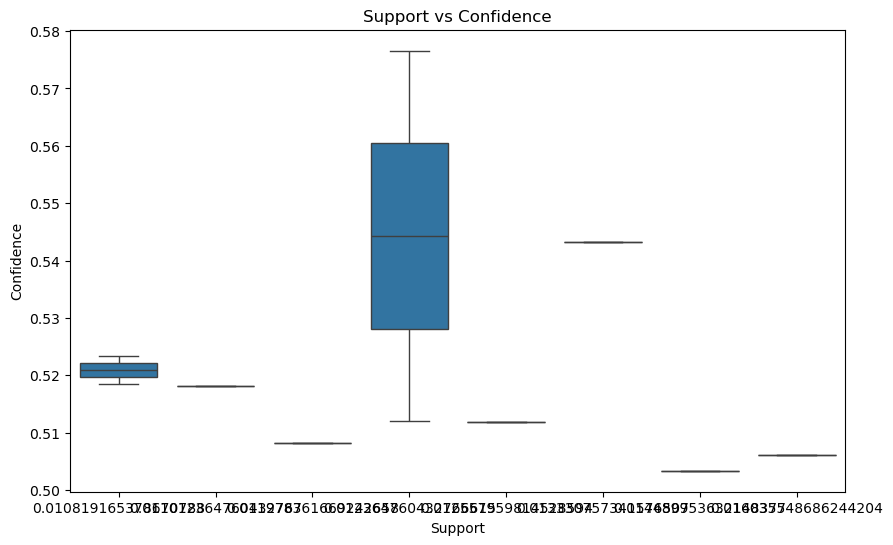

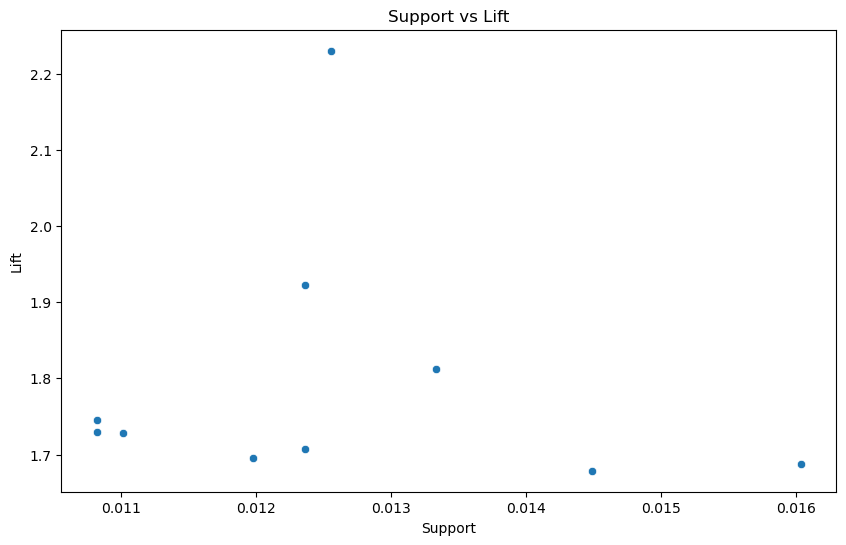

In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import mlxtend as ml
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


# Load dataset
df = pd.read_csv('online_retail.csv', header=None)


# Preprocess data
def preprocess_data(df):
    # Handle missing values
    df = df.fillna('Unknown')
    
    # Remove duplicates
    df = df.drop_duplicates()
    
    return df


# Split comma-separated products into individual products
def split_products(df):
    transactions = df[0].str.split(',')
    return transactions


# Apply Apriori algorithm
def apply_apriori(transactions, min_support):
    te = TransactionEncoder()
    te_ary = te.fit_transform(transactions)
    df_transactions = pd.DataFrame(te_ary, columns=te.columns_)
    frequent_itemsets = apriori(df_transactions, min_support=min_support, use_colnames=True)
    return frequent_itemsets


# Apply association rule mining
def association_rule_mining(frequent_itemsets, min_threshold):
    rules = association_rules(frequent_itemsets, metric="lift", min_threshold=min_threshold)
    return rules


# Set thresholds
def set_thresholds(rules, min_support, min_confidence, min_lift):
    rules = rules[(rules['support'] >= min_support) & 
                  (rules['confidence'] >= min_confidence) & 
                  (rules['lift'] >= min_lift)]
    return rules


# Analyze generated rules
def analyze_rules(rules):
    print("\nTop 10 Association Rules:")
    print(rules.nlargest(10, 'lift'))
    
    # Visualization 1: Antecedents Frequency
    plt.figure(figsize=(10, 6))
    antecedents_counts = rules['antecedents'].value_counts()
    labels = [', '.join(map(str, item)) for item in antecedents_counts.index[:10]]
    plt.bar(labels, antecedents_counts.values[:10])
    plt.xlabel('Product Combinations')
    plt.ylabel('Frequency')
    plt.title('Product Associations')
    plt.xticks(rotation=90) 
    plt.tight_layout() 
    plt.show()
    
    # Visualization 2: Support vs Confidence Boxplot
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=rules['support'], y=rules['confidence'])
    plt.xlabel('Support')
    plt.ylabel('Confidence')
    plt.title('Support vs Confidence')
    plt.show()
    
    # Visualization 3: Support vs Lift Scatterplot
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=rules['support'], y=rules['lift'])
    plt.xlabel('Support')
    plt.ylabel('Lift')
    plt.title('Support vs Lift')
    plt.show()


# Main function
def main():
    global df
    df = preprocess_data(df)
    transactions = split_products(df)
    
    min_support = 0.01
    min_threshold = 0.5
    min_confidence = 0.5
    min_lift = 1
    
    frequent_itemsets = apply_apriori(transactions, min_support)
    rules = association_rule_mining(frequent_itemsets, min_threshold)
    rules = set_thresholds(rules, min_support, min_confidence, min_lift)
    analyze_rules(rules)


if __name__ == "__main__":
    main()



### Summary 

In [5]:
# Print statements for better readability
print("\n------------------------- Association Rule Mining Analysis -------------------------")
print("The analysis revealed insightful patterns and relationships between products, showcasing customer purchasing behavior.")
print("Key findings include:")
print("-------------------------------------------------------------------------")
print("* Frequent product combinations and associations")
print("* Strong rules indicating customer preferences")
print("* Valuable insights into customer purchasing habits")
print("-------------------------------------------------------------------------\n")


print("\n------------------------- Insights into Customer Purchasing Behavior -------------------------")
print("The discovered rules provide valuable insights into customer purchasing behavior, including:")
print("-------------------------------------------------------------------------")
print("* Products frequently purchased together")
print("* Popular product combinations")
print("* Customer preferences and shopping patterns")
print("-------------------------------------------------------------------------\n")


print("\n------------------------- Business Implications -------------------------")
print("This analysis enables businesses to:")
print("-------------------------------------------------------------------------")
print("* Optimize product placement and marketing strategies")
print("* Enhance customer experience through targeted recommendations")
print("* Improve overall sales and revenue")
print("-------------------------------------------------------------------------\n")


------------------------- Association Rule Mining Analysis -------------------------
The analysis revealed insightful patterns and relationships between products, showcasing customer purchasing behavior.
Key findings include:
-------------------------------------------------------------------------
* Frequent product combinations and associations
* Strong rules indicating customer preferences
* Valuable insights into customer purchasing habits
-------------------------------------------------------------------------


------------------------- Insights into Customer Purchasing Behavior -------------------------
The discovered rules provide valuable insights into customer purchasing behavior, including:
-------------------------------------------------------------------------
* Products frequently purchased together
* Popular product combinations
* Customer preferences and shopping patterns
-------------------------------------------------------------------------


--------------------